In [52]:
import numpy

In [6]:
n=4
k=2
q=41 #Lithium AAA?  #same as Alkaline D
#q should be divisible by 8 for NTT
η=1 #secret key range, prefered 2 in Alkaline
γ=2^4 #y coeff range, power of 2, exponent about 2/3 of q?  Earlier version was *not* power of 2
R.<x> = ZZ[]

In [7]:
qlen = ceil(log(q,2))
qlen

6

In [8]:
dboxlen = qlen

$(M \bullet w) \bmod 64$

In [9]:
def Dboxbiased(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % (2**itemlen) # make sure all bits of input are used
    out = format(newitem, f'0{itemlen}b')
    return out

In [10]:
def Dboxbiasedraw(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % (2**itemlen) # make sure all bits of input are used
    out = newitem
    return out

In [11]:
[randrange(1,27) for x in range(n)] # generate random message

[12, 14, 3, 13]

In [12]:
[randrange(0, q) for x in range(n)] # generate random commit

[22, 38, 20, 28]

In [13]:
Dboxbiased([randrange(1,27) for x in range(n)], [randrange(0, q) for x in range(4)], dboxlen)

'010010'

In [15]:
for i in range(1,10):
    print(Dboxbiasedraw([randrange(1,27) for x in range(n)], [randrange(0, q) for x in range(4)], dboxlen))

44
1
55
6
36
22
5
50
53


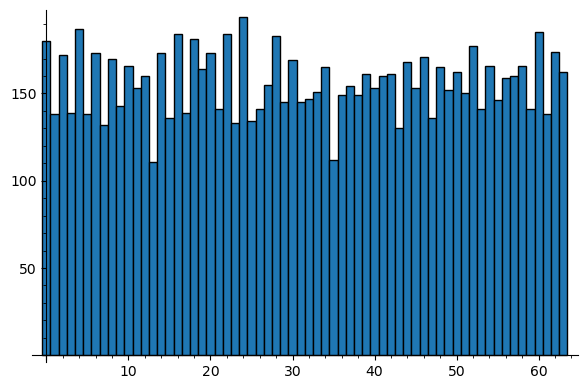

In [27]:
datalist = []
for i in range(10000):
    datalist = datalist + [Dboxbiasedraw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

In [30]:
datalist = []
for i in range(10000):
    datalist = datalist + [Dboxbiasedraw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen) % 2]
numpy.mean(datalist)

0.4602

In [50]:
datalist0 = []
datalist1 = []
datalist2 = []
datalist3 = []
datalist4 = []
datalist5 = []
for i in range(100000):
    Dboxtemp = Dboxbiasedraw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen)
    datalist0 = datalist0 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist1 = datalist1 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist2 = datalist2 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist3 = datalist3 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist4 = datalist4 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist5 = datalist5 + [Dboxtemp % 2]
print(numpy.mean(datalist0))
print(numpy.mean(datalist1))
print(numpy.mean(datalist2))
print(numpy.mean(datalist3))
print(numpy.mean(datalist4))
print(numpy.mean(datalist5))

0.4696
0.49991
0.50131
0.50199
0.50078
0.49973


$f(M \bullet w \bmod 41) \bmod 64$

In [2]:
def f(x):  #permutation polynomial mod 2^n
    return 2*x^2 + x

In [32]:
def Dbox41raw(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % q # make sure all bits of input are used
    out = f(newitem) % (2**itemlen)
    return out

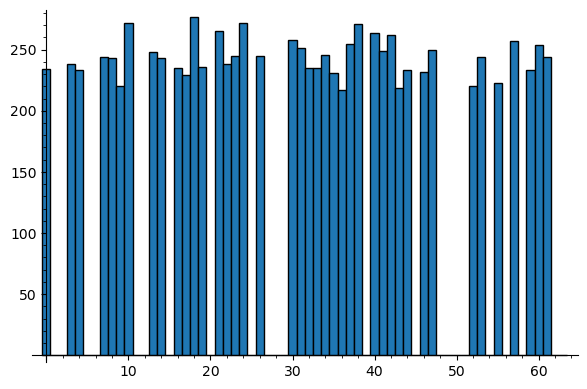

In [34]:
datalist = []
for i in range(10000):
    datalist = datalist + [Dbox41raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

In [35]:
datalist = []
for i in range(10000):
    datalist = datalist + [Dbox41raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen) % 2]
numpy.mean(datalist)

0.4837

In [48]:
datalist0 = []
datalist1 = []
datalist2 = []
datalist3 = []
datalist4 = []
datalist5 = []
for i in range(10000):
    Dboxtemp = Dbox41raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen)
    datalist0 = datalist0 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist1 = datalist1 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist2 = datalist2 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist3 = datalist3 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist4 = datalist4 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist5 = datalist5 + [Dboxtemp % 2]
print(numpy.mean(datalist0))
print(numpy.mean(datalist1))
print(numpy.mean(datalist2))
print(numpy.mean(datalist3))
print(numpy.mean(datalist4))
print(numpy.mean(datalist5))

0.4879
0.4868
0.4853
0.4899
0.4334
0.5111


$(M \bullet w \bmod 65) \bmod 64$

In [15]:
def f(x):  #permutation polynomial mod 2^n
    return 2*x^2 + x

In [37]:
def Dbox65raw(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % (2**itemlen+1) # make sure all bits of input are used
    out = (newitem) % (2**itemlen)
    return out

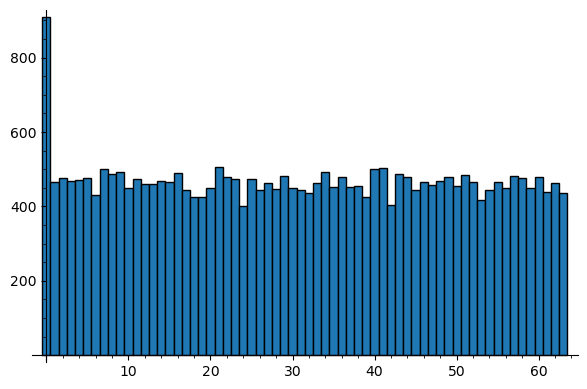

In [38]:
datalist = []
for i in range(30000):
    datalist = datalist + [Dbox65raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

In [67]:
datalist0 = []
datalist1 = []
datalist2 = []
datalist3 = []
datalist4 = []
datalist5 = []
for i in range(30000):
    Dboxtemp = Dbox65raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen)
    datalist0 = datalist0 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist1 = datalist1 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist2 = datalist2 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist3 = datalist3 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist4 = datalist4 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist5 = datalist5 + [Dboxtemp % 2]
print(numpy.mean(datalist0))
print(numpy.mean(datalist1))
print(numpy.mean(datalist2))
print(numpy.mean(datalist3))
print(numpy.mean(datalist4))
print(numpy.mean(datalist5))

0.48923333333333335
0.4921333333333333
0.5001
0.4893
0.4866333333333333
0.49483333333333335


$(M \bullet w \bmod 67) \bmod 64$

In [1]:
def f(x):  #permutation polynomial mod 2^n
    return 2*x^2 + x

In [40]:
def Dbox67raw(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % (2**itemlen+3) # make sure all bits of input are used
    out = (newitem) % (2**itemlen)
    return out

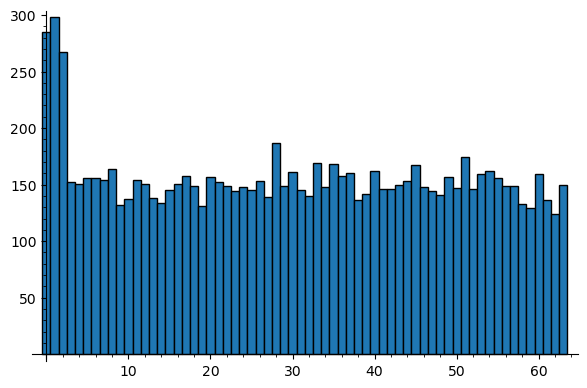

In [70]:
datalist = []
for i in range(10000):
    datalist = datalist + [Dbox67raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

In [69]:
datalist0 = []
datalist1 = []
datalist2 = []
datalist3 = []
datalist4 = []
datalist5 = []
for i in range(25000):
    Dboxtemp = Dbox67raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen)
    datalist0 = datalist0 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist1 = datalist1 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist2 = datalist2 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist3 = datalist3 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist4 = datalist4 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist5 = datalist5 + [Dboxtemp % 2]
print(numpy.mean(datalist0))
print(numpy.mean(datalist1))
print(numpy.mean(datalist2))
print(numpy.mean(datalist3))
print(numpy.mean(datalist4))
print(numpy.mean(datalist5))

0.4908
0.49468
0.47432
0.4786
0.47928
0.47988


$(M \bullet w \bmod 257) \bmod 64$

In [56]:
n*2**dboxlen+1

257

In [57]:
def Dbox257raw(list1, list2, itemlen):
    newitem = vector(list1).dot_product(vector(list2)) % (n*2**itemlen+1) # make sure all bits of input are used
    out = (newitem) % (2**itemlen)
    return out

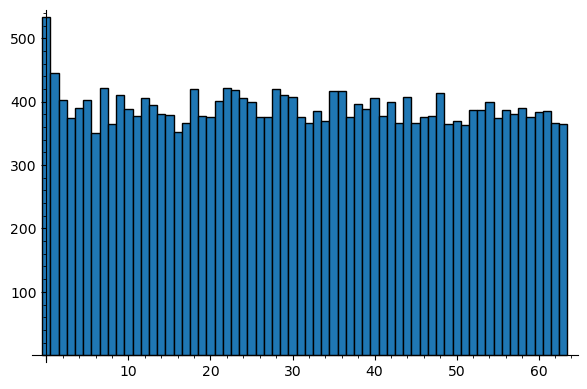

In [71]:
datalist = []
for i in range(25000):
    datalist = datalist + [Dbox257raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

In [68]:
datalist0 = []
datalist1 = []
datalist2 = []
datalist3 = []
datalist4 = []
datalist5 = []
for i in range(25000):
    Dboxtemp = Dbox257raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen)
    datalist0 = datalist0 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist1 = datalist1 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist2 = datalist2 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist3 = datalist3 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist4 = datalist4 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist5 = datalist5 + [Dboxtemp % 2]
print(numpy.mean(datalist0))
print(numpy.mean(datalist1))
print(numpy.mean(datalist2))
print(numpy.mean(datalist3))
print(numpy.mean(datalist4))
print(numpy.mean(datalist5))

0.49688
0.49892
0.49764
0.50512
0.49524
0.4978


In [77]:
M = vector([14, 21, 17, 11])

In [80]:
2*M+vector([1]*n)

(29, 43, 35, 23)

$((2M+1) \bullet (2w+1))/2 \bmod 64$

In [18]:
def Dbox128raw(list1, list2, itemlen):
    one = vector([1]*4)
    newitem = (2*vector(list1)+one).dot_product(2*vector(list2)+one)  # make sure all bits of input are used
    out = (newitem//2) % (2**itemlen)
    return out

In [97]:
for i in range(1,10):
    print(Dbox128raw([randrange(1,27) for x in range(n)], [randrange(0, q) for x in range(4)], dboxlen))

9
40
23
46
12
58
31
30
28


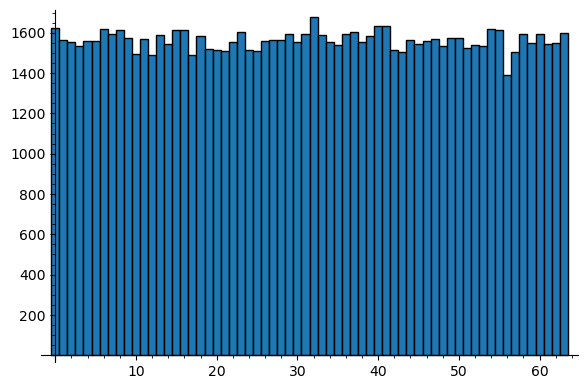

In [101]:
datalist = []
for i in range(100000):
    datalist = datalist + [Dbox128raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=64, range=[-0.5, 63.5])

In [100]:
datalist0 = []
datalist1 = []
datalist2 = []
datalist3 = []
datalist4 = []
datalist5 = []
for i in range(100000):
    Dboxtemp = Dbox128raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], 
                                   dboxlen)
    datalist0 = datalist0 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist1 = datalist1 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist2 = datalist2 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist3 = datalist3 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist4 = datalist4 + [Dboxtemp % 2]
    Dboxtemp = Dboxtemp // 2
    datalist5 = datalist5 + [Dboxtemp % 2]
print(numpy.mean(datalist0))
print(numpy.mean(datalist1))
print(numpy.mean(datalist2))
print(numpy.mean(datalist3))
print(numpy.mean(datalist4))
print(numpy.mean(datalist5))

0.49856
0.49945
0.49725
0.5007
0.49894
0.49978


(temporary place to put this)

In [1]:
def XOF(list1, list2, itemlen, numbits):
    out = ""
    list11 = list1
    while len(out)<numbits:
        newitem = vector(list11).dot_product(vector(list2)) % (2**itemlen) # make sure all bits of input are used
        out = out + format(newitem, f'0{itemlen}b')
        list11 = [newitem] + list11[:-1]
    return out[:numbits]

---------
---------

Other Parameters
===

In [16]:
q=97 #Lithium AA and C?
dboxlen = 7 #AA and SubC?

In [19]:
for i in range(1,10):
    print(Dbox128raw([randrange(1,27) for x in range(n)], [randrange(0, q) for x in range(4)], dboxlen))

48
94
104
60
97
107
95
81
62


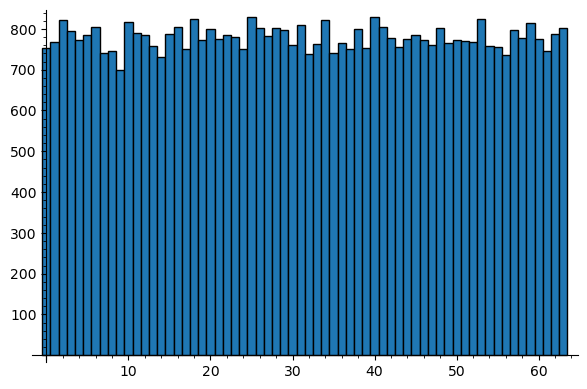

In [20]:
datalist = []
for i in range(100000):
    datalist = datalist + [Dbox128raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=2**dboxlen, range=[-0.5, 2**dboxlen-0.5])

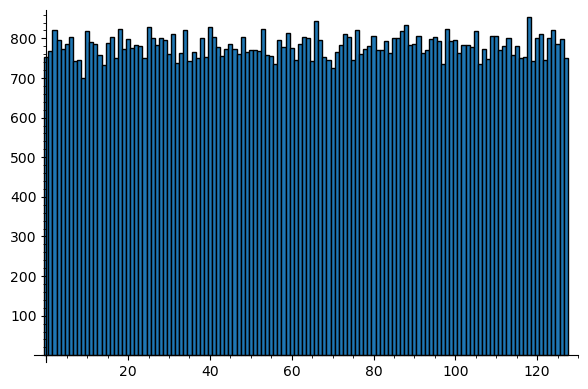

In [22]:
sage.plot.histogram.histogram(datalist, bins=2**dboxlen, range=[-0.5, 2**dboxlen-0.5])

In [24]:
100000/2**dboxlen.n()

781.250000000000

In [27]:
len(datalist)

100000

In [29]:
from scipy.stats import chisquare
import scipy

In [34]:
freqtable = scipy.ndimage.histogram(datalist, 0, 2**dboxlen, 2**dboxlen)
freqtable

array([752, 767, 822, 795, 773, 786, 804, 742, 745, 700, 818, 790, 785,
       758, 732, 788, 804, 751, 824, 773, 799, 776, 784, 781, 751, 828,
       801, 783, 801, 797, 760, 810, 739, 763, 822, 742, 766, 751, 800,
       754, 830, 804, 778, 755, 774, 785, 773, 761, 803, 766, 772, 771,
       767, 825, 758, 755, 736, 797, 778, 814, 776, 746, 787, 803, 801,
       742, 843, 796, 752, 746, 726, 765, 784, 810, 804, 745, 820, 761,
       773, 782, 807, 770, 770, 793, 762, 802, 802, 819, 835, 784, 786,
       807, 763, 772, 798, 803, 793, 735, 823, 794, 796, 763, 784, 783,
       779, 819, 736, 773, 749, 805, 805, 772, 781, 802, 758, 781, 750,
       753, 855, 743, 800, 811, 745, 802, 820, 786, 799, 751])

In [35]:
chisquare(f_obs=freqtable, f_exp=[100000/2**dboxlen]*128)

Power_divergenceResult(statistic=125.47327999999999, pvalue=0.5216492940415821)

Good.

As opposed to:

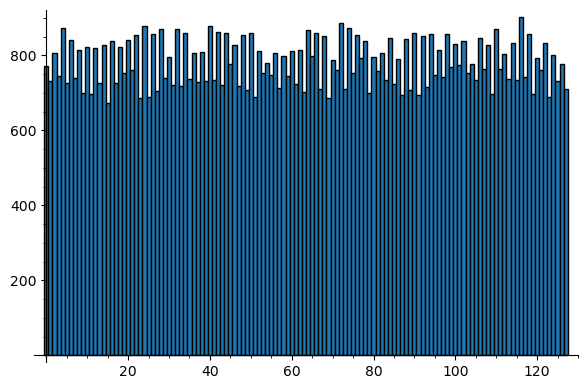

In [36]:
datalist = []
for i in range(100000):
    datalist = datalist + [Dboxbiasedraw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=2**dboxlen, range=[-0.5, 2**dboxlen-0.5])

In [37]:
freqtable = scipy.ndimage.histogram(datalist, 0, 2**dboxlen, 2**dboxlen)
freqtable

array([771, 731, 806, 744, 873, 727, 840, 739, 813, 700, 823, 698, 820,
       726, 827, 672, 839, 725, 823, 754, 842, 761, 855, 687, 878, 688,
       858, 706, 869, 739, 796, 720, 871, 719, 859, 737, 806, 728, 809,
       732, 877, 733, 863, 721, 860, 777, 828, 718, 853, 707, 859, 688,
       811, 754, 780, 747, 807, 713, 799, 744, 812, 724, 814, 701, 867,
       797, 859, 710, 852, 686, 788, 761, 887, 710, 872, 752, 853, 792,
       838, 699, 796, 759, 807, 733, 847, 723, 791, 694, 844, 707, 859,
       695, 852, 716, 856, 748, 813, 742, 858, 770, 829, 774, 837, 752,
       777, 735, 846, 763, 827, 696, 870, 763, 804, 738, 832, 733, 903,
       743, 856, 696, 792, 760, 832, 689, 801, 732, 777, 709])

In [38]:
chisquare(f_obs=freqtable, f_exp=[100000/2**dboxlen]*128)

Power_divergenceResult(statistic=590.656, pvalue=6.93086823237689e-61)

Yes, perfect.

---

In [39]:
q=97 #Lithium AA and C?
dboxlen = 8 #C and D?

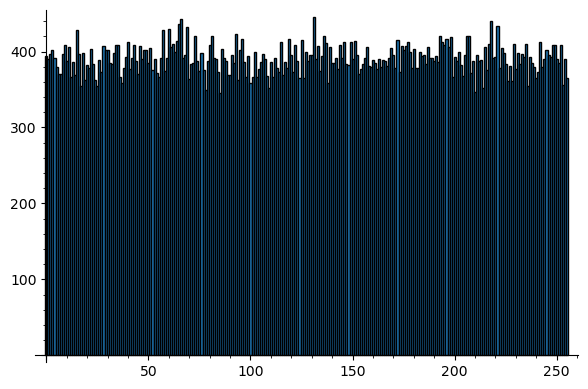

In [44]:
datalist = []
for i in range(100000):
    datalist = datalist + [Dbox128raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=2**dboxlen, range=[-0.5, 2**dboxlen-0.5])

In [45]:
freqtable = scipy.ndimage.histogram(datalist, 0, 2**dboxlen, 2**dboxlen)
freqtable

array([394, 390, 397, 402, 391, 380, 371, 370, 397, 409, 387, 406, 366,
       386, 369, 429, 397, 355, 398, 363, 382, 378, 404, 383, 362, 355,
       389, 373, 407, 402, 402, 385, 384, 398, 409, 409, 367, 358, 379,
       393, 412, 377, 391, 409, 388, 371, 407, 390, 402, 402, 385, 405,
       376, 390, 372, 367, 391, 429, 375, 391, 430, 406, 410, 399, 414,
       436, 443, 391, 396, 432, 364, 383, 385, 420, 388, 375, 398, 376,
       350, 387, 408, 420, 391, 390, 373, 345, 403, 391, 387, 369, 369,
       396, 385, 423, 363, 402, 416, 386, 367, 394, 359, 366, 399, 366,
       377, 386, 397, 390, 368, 352, 386, 367, 392, 378, 373, 413, 369,
       386, 378, 416, 396, 373, 408, 388, 365, 415, 365, 399, 387, 396,
       396, 446, 390, 407, 375, 394, 421, 411, 359, 406, 385, 385, 392,
       377, 408, 392, 412, 383, 382, 413, 390, 414, 396, 370, 377, 384,
       391, 406, 381, 380, 389, 385, 377, 390, 380, 389, 387, 381, 391,
       405, 395, 378, 415, 373, 407, 402, 407, 413, 399, 378, 40

In [46]:
chisquare(f_obs=freqtable, f_exp=[100000/2**dboxlen]*2**dboxlen)

Power_divergenceResult(statistic=222.28992, pvalue=0.9313070764585127)

Still good.

-----

In [52]:
q=193 #Lithium D?
dboxlen = 8 #C and D?

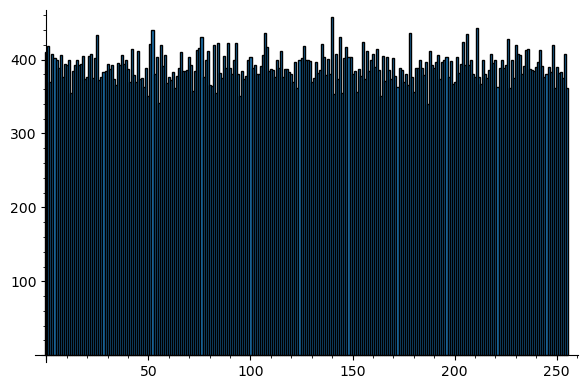

In [53]:
datalist = []
for i in range(100000):
    datalist = datalist + [Dbox128raw([randrange(1,27) for x in range(n)], [randrange(0, q-1) for x in range(4)], dboxlen)]
sage.plot.histogram.histogram(datalist, bins=2**dboxlen, range=[-0.5, 2**dboxlen-0.5])

In [54]:
freqtable = scipy.ndimage.histogram(datalist, 0, 2**dboxlen, 2**dboxlen)
freqtable

array([410, 418, 369, 408, 402, 399, 389, 406, 376, 394, 393, 399, 355,
       385, 393, 400, 392, 394, 405, 374, 377, 405, 408, 375, 402, 433,
       372, 376, 383, 385, 394, 387, 393, 373, 365, 395, 393, 406, 394,
       400, 387, 370, 414, 379, 370, 412, 373, 375, 363, 389, 350, 421,
       440, 381, 403, 341, 419, 391, 406, 368, 377, 372, 383, 361, 378,
       388, 410, 384, 385, 386, 403, 392, 357, 385, 413, 416, 431, 377,
       399, 412, 366, 364, 419, 355, 422, 382, 375, 405, 388, 423, 389,
       380, 399, 422, 381, 351, 385, 373, 378, 400, 403, 389, 393, 380,
       380, 391, 406, 436, 417, 385, 387, 386, 377, 399, 388, 412, 376,
       387, 387, 383, 381, 370, 396, 362, 399, 402, 418, 399, 399, 398,
       370, 375, 396, 382, 386, 421, 403, 379, 401, 380, 458, 354, 408,
       374, 431, 355, 402, 417, 403, 404, 380, 385, 356, 387, 378, 424,
       373, 412, 385, 400, 407, 390, 414, 386, 351, 405, 371, 403, 386,
       373, 402, 378, 363, 389, 386, 369, 381, 366, 436, 377, 35

In [55]:
chisquare(f_obs=freqtable, f_exp=[100000/2**dboxlen]*2**dboxlen)

Power_divergenceResult(statistic=240.70656, pvalue=0.7308830913306418)